Below are the packages used in this project.

In [1]:
import numpy as np
import keras
import matplotlib.pyplot as plt
from keras.models import Sequential
from sklearn.preprocessing import StandardScaler
from keras.layers import Dense, Dropout
from keras.layers.normalization import BatchNormalization
import pandas as pd

Using TensorFlow backend.


In [2]:
input_path = 'data/Elearning-Data-cut.xls'
train_data_count = 640

The data is split into train and test sets. the data is read using `pandas` and tha `NaN` values are replaced with $0$. also the student No. column is dropped since we don't need it.

In [3]:
def read_input():
    input = pd.read_excel(input_path, 0)
    input = input.drop(['STUDENTN'], axis=1)
    input = input.fillna(0)
    output_gpa = pd.read_excel(input_path, 1)
    output_fail = pd.read_excel(input_path, 2)[['OUT_IN']]
    return input, output_gpa, output_fail

Here the data is converted from `pandas datafram` to `numpy array`. For the second part of the project (Classfication), Because the data is not balanced and there are lots more `passed` classes than `failed` classes, we duplicate rows belonging to `failed` classes. And then the data is split into train and test sets. Finally all the data are normalized using `StandardScaler().fit_transform`.

In [4]:
input, output_gpa, output_fail = read_input()
input = input.to_numpy()
output_gpa = output_gpa.to_numpy()
output_fail = output_fail.to_numpy()
input2 = []
output_fail2 = []

for i in range(len(input)):
    if output_fail[i] == 0:
        input2.append(input[i])
        input2.append(input[i])
        output_fail2.append([output_fail[i][0]])
        output_fail2.append([output_fail[i][0]])
    else:
        input2.append(input[i])
        output_fail2.append([output_fail[i][0]])
        
input2 = np.array(input2)
output_fail2 = np.array(output_fail2)

X_train = input[:train_data_count]
X_train2 = input2[:train_data_count]

Y_train = output_gpa[:train_data_count]
Y_train2 = output_fail2[:train_data_count]

X_test = input[train_data_count:]
X_test2 = input2[train_data_count:]

Y_test = output_gpa[train_data_count:]
Y_test2 = output_fail2[train_data_count:]
Y_test22 = output_fail[train_data_count:]

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)
X_test2 = ss.fit_transform(X_test2)
X_train2 = ss.fit_transform(X_train2)

# Regression
For this part, we design a `sequential` model having 2 hidden layers with 250 and 150 neurons respectively. The output layer has 1 nueron. Also all the layers are using `relu` as their activation function. `Nadam` is used as the optimizer and `mse` is used as loss function and the metric. These are obtained by trial and error. Also there's a batch normalizer layer between each of the layers that normalizes the current batch which is being fed to the network.
finally the data is shuffled and the network is trained for 800 epochs.

In [5]:
model = Sequential()
model.add(BatchNormalization())
model.add(Dense(250, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(150, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1))
model.compile(optimizer='Nadam', loss='mse', metrics=['mse'])
result = model.fit(X_train, Y_train,batch_size=32, epochs=400)

Epoch 1/400
640/640 [==============================] - 1s 1ms/step - loss: 195.2816 - mse: 195.2816
Epoch 2/400
640/640 [==============================] - 0s 83us/step - loss: 171.0429 - mse: 171.0429
Epoch 3/400
640/640 [==============================] - 0s 73us/step - loss: 130.3741 - mse: 130.3741
Epoch 4/400
640/640 [==============================] - 0s 80us/step - loss: 80.4407 - mse: 80.4407
Epoch 5/400
640/640 [==============================] - 0s 81us/step - loss: 37.5905 - mse: 37.5905
Epoch 6/400
640/640 [==============================] - 0s 85us/step - loss: 12.9863 - mse: 12.9863
Epoch 7/400
640/640 [==============================] - 0s 84us/step - loss: 4.6627 - mse: 4.6627
Epoch 8/400
640/640 [==============================] - 0s 91us/step - loss: 2.4559 - mse: 2.4559
Epoch 9/400
640/640 [==============================] - 0s 98us/step - loss: 2.2705 - mse: 2.2705
Epoch 10/400
640/640 [==============================] - 0s 81us/step - loss: 2.1992 - mse: 2.1992
Epoch 11/400

640/640 [==============================] - 0s 72us/step - loss: 0.7371 - mse: 0.7371
Epoch 85/400
640/640 [==============================] - 0s 72us/step - loss: 0.6839 - mse: 0.6839
Epoch 86/400
640/640 [==============================] - 0s 75us/step - loss: 0.8328 - mse: 0.8328
Epoch 87/400
640/640 [==============================] - 0s 74us/step - loss: 0.6442 - mse: 0.6442
Epoch 88/400
640/640 [==============================] - 0s 74us/step - loss: 0.5691 - mse: 0.5691
Epoch 89/400
640/640 [==============================] - 0s 74us/step - loss: 0.6019 - mse: 0.6019
Epoch 90/400
640/640 [==============================] - 0s 66us/step - loss: 0.5932 - mse: 0.5932
Epoch 91/400
640/640 [==============================] - 0s 64us/step - loss: 0.5887 - mse: 0.5887
Epoch 92/400
640/640 [==============================] - 0s 72us/step - loss: 0.6236 - mse: 0.6236
Epoch 93/400
640/640 [==============================] - 0s 75us/step - loss: 0.6302 - mse: 0.6302
Epoch 94/400
640/640 [===========

Epoch 167/400
640/640 [==============================] - 0s 152us/step - loss: 0.4509 - mse: 0.4509
Epoch 168/400
640/640 [==============================] - 0s 213us/step - loss: 0.3910 - mse: 0.3910
Epoch 169/400
640/640 [==============================] - 0s 166us/step - loss: 0.4272 - mse: 0.4272
Epoch 170/400
640/640 [==============================] - 0s 131us/step - loss: 0.5176 - mse: 0.5176
Epoch 171/400
640/640 [==============================] - 0s 155us/step - loss: 0.6255 - mse: 0.6255
Epoch 172/400
640/640 [==============================] - 0s 308us/step - loss: 0.5471 - mse: 0.5471
Epoch 173/400
640/640 [==============================] - 0s 163us/step - loss: 0.6517 - mse: 0.6517
Epoch 174/400
640/640 [==============================] - 0s 157us/step - loss: 0.4971 - mse: 0.4971
Epoch 175/400
640/640 [==============================] - 0s 114us/step - loss: 0.4771 - mse: 0.4771
Epoch 176/400
640/640 [==============================] - 0s 98us/step - loss: 0.3247 - mse: 0.3247
E

640/640 [==============================] - 0s 105us/step - loss: 0.4398 - mse: 0.4398
Epoch 250/400
640/640 [==============================] - 0s 107us/step - loss: 0.3303 - mse: 0.3303
Epoch 251/400
640/640 [==============================] - 0s 138us/step - loss: 0.3419 - mse: 0.3419
Epoch 252/400
640/640 [==============================] - 0s 133us/step - loss: 0.4275 - mse: 0.4275
Epoch 253/400
640/640 [==============================] - 0s 122us/step - loss: 0.3788 - mse: 0.3788
Epoch 254/400
640/640 [==============================] - 0s 116us/step - loss: 0.4566 - mse: 0.4566
Epoch 255/400
640/640 [==============================] - 0s 112us/step - loss: 0.3935 - mse: 0.3935
Epoch 256/400
640/640 [==============================] - 0s 77us/step - loss: 0.4693 - mse: 0.4693
Epoch 257/400
640/640 [==============================] - 0s 95us/step - loss: 0.5260 - mse: 0.5260
Epoch 258/400
640/640 [==============================] - 0s 133us/step - loss: 0.5338 - mse: 0.5338
Epoch 259/400
64

640/640 [==============================] - 0s 81us/step - loss: 0.5326 - mse: 0.5326
Epoch 332/400
640/640 [==============================] - 0s 68us/step - loss: 0.3311 - mse: 0.3311
Epoch 333/400
640/640 [==============================] - 0s 80us/step - loss: 0.4074 - mse: 0.4074
Epoch 334/400
640/640 [==============================] - 0s 85us/step - loss: 0.3581 - mse: 0.3581
Epoch 335/400
640/640 [==============================] - 0s 83us/step - loss: 0.4030 - mse: 0.4030
Epoch 336/400
640/640 [==============================] - 0s 72us/step - loss: 0.4532 - mse: 0.4532
Epoch 337/400
640/640 [==============================] - 0s 106us/step - loss: 0.3479 - mse: 0.3479
Epoch 338/400
640/640 [==============================] - 0s 112us/step - loss: 0.4240 - mse: 0.4240
Epoch 339/400
640/640 [==============================] - 0s 93us/step - loss: 0.3852 - mse: 0.3852
Epoch 340/400
640/640 [==============================] - 0s 82us/step - loss: 0.5516 - mse: 0.5516
Epoch 341/400
640/640 

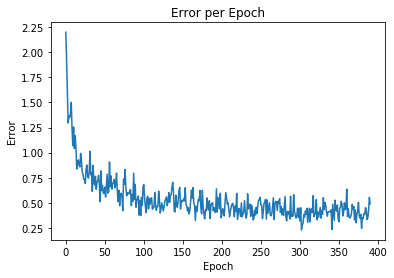

In [6]:
plt.plot(result.history['mse'][9:], label='Error')
plt.title("Error per Epoch")
plt.ylabel("Error")
plt.xlabel("Epoch")
plt.show()

Below are the evaluation and prediction of the test data.

In [7]:
model.evaluate(X_test,Y_test)

100/100 [==============================] - 0s 868us/step


[2.239789342880249, 2.2397892475128174]

In [8]:
model.predict(X_test)

array([[16.066086 ],
       [15.98393  ],
       [11.870772 ],
       [12.667431 ],
       [13.573432 ],
       [ 9.863728 ],
       [11.944125 ],
       [12.73495  ],
       [10.266866 ],
       [10.733826 ],
       [11.250207 ],
       [11.349945 ],
       [12.134901 ],
       [10.847218 ],
       [15.681121 ],
       [10.969329 ],
       [11.385669 ],
       [14.39683  ],
       [17.971432 ],
       [12.48136  ],
       [11.440838 ],
       [16.00816  ],
       [14.516333 ],
       [16.691385 ],
       [13.32311  ],
       [11.829491 ],
       [13.055396 ],
       [14.968102 ],
       [10.799687 ],
       [12.107593 ],
       [17.106564 ],
       [14.672067 ],
       [14.521335 ],
       [15.66048  ],
       [16.555681 ],
       [16.140974 ],
       [13.721002 ],
       [14.027346 ],
       [16.178965 ],
       [14.742581 ],
       [17.239153 ],
       [16.202415 ],
       [15.156428 ],
       [12.744971 ],
       [12.250231 ],
       [12.929467 ],
       [12.152541 ],
       [13.43

# Classification
For the second part we had to classify the data into 2 categories. Same architecture is used as the previous model with the exception that the output layer's activation function is `sigmoid` instead of `relu`.
`binary_crossentropy` is used as loss function and `accuracy` is used as metric. The final result of the network's training is and accuracy between 70% and 80% on the train data.

In [9]:
model2 = Sequential()
model2.add(BatchNormalization())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.01))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.01))
model2.add(Dense(1, activation='sigmoid'))
sgd = keras.optimizers.sgd(lr=0.05, decay=1e-6, momentum=0.9, nesterov=True)
model2.compile(optimizer='Nadam', loss='binary_crossentropy', metrics=['accuracy'])
result2 = model2.fit(X_train2, Y_train2,batch_size=32,validation_data=(X_test2, Y_test2),shuffle = True, epochs=150)

Train on 640 samples, validate on 222 samples
Epoch 1/150
640/640 [==============================] - 0s 422us/step - loss: 0.7881 - accuracy: 0.5453 - val_loss: 0.7396 - val_accuracy: 0.5811
Epoch 2/150
640/640 [==============================] - 0s 50us/step - loss: 0.7137 - accuracy: 0.6031 - val_loss: 0.6582 - val_accuracy: 0.6532
Epoch 3/150
640/640 [==============================] - 0s 44us/step - loss: 0.6406 - accuracy: 0.6438 - val_loss: 0.6032 - val_accuracy: 0.6847
Epoch 4/150
640/640 [==============================] - 0s 47us/step - loss: 0.6090 - accuracy: 0.6734 - val_loss: 0.5666 - val_accuracy: 0.7162
Epoch 5/150
640/640 [==============================] - 0s 46us/step - loss: 0.5821 - accuracy: 0.6828 - val_loss: 0.5416 - val_accuracy: 0.7387
Epoch 6/150
640/640 [==============================] - 0s 42us/step - loss: 0.5615 - accuracy: 0.6844 - val_loss: 0.5242 - val_accuracy: 0.7658
Epoch 7/150
640/640 [==============================] - 0s 40us/step - loss: 0.5305 - accu

640/640 [==============================] - 0s 37us/step - loss: 0.3821 - accuracy: 0.8062 - val_loss: 0.4315 - val_accuracy: 0.8153
Epoch 58/150
640/640 [==============================] - 0s 40us/step - loss: 0.3961 - accuracy: 0.7937 - val_loss: 0.4324 - val_accuracy: 0.8153
Epoch 59/150
640/640 [==============================] - 0s 37us/step - loss: 0.3831 - accuracy: 0.8094 - val_loss: 0.4328 - val_accuracy: 0.8153
Epoch 60/150
640/640 [==============================] - 0s 39us/step - loss: 0.3760 - accuracy: 0.8250 - val_loss: 0.4323 - val_accuracy: 0.8153
Epoch 61/150
640/640 [==============================] - 0s 39us/step - loss: 0.3896 - accuracy: 0.8156 - val_loss: 0.4319 - val_accuracy: 0.8153
Epoch 62/150
640/640 [==============================] - 0s 42us/step - loss: 0.3807 - accuracy: 0.8219 - val_loss: 0.4325 - val_accuracy: 0.8153
Epoch 63/150
640/640 [==============================] - 0s 41us/step - loss: 0.3782 - accuracy: 0.8172 - val_loss: 0.4332 - val_accuracy: 0.824

640/640 [==============================] - 0s 50us/step - loss: 0.3618 - accuracy: 0.8156 - val_loss: 0.4348 - val_accuracy: 0.8063
Epoch 114/150
640/640 [==============================] - 0s 48us/step - loss: 0.3619 - accuracy: 0.8172 - val_loss: 0.4347 - val_accuracy: 0.8063
Epoch 115/150
640/640 [==============================] - 0s 52us/step - loss: 0.3705 - accuracy: 0.8141 - val_loss: 0.4343 - val_accuracy: 0.8108
Epoch 116/150
640/640 [==============================] - 0s 58us/step - loss: 0.3657 - accuracy: 0.8156 - val_loss: 0.4336 - val_accuracy: 0.8063
Epoch 117/150
640/640 [==============================] - 0s 47us/step - loss: 0.3668 - accuracy: 0.8203 - val_loss: 0.4348 - val_accuracy: 0.8063
Epoch 118/150
640/640 [==============================] - 0s 47us/step - loss: 0.3690 - accuracy: 0.8016 - val_loss: 0.4341 - val_accuracy: 0.8108
Epoch 119/150
640/640 [==============================] - 0s 49us/step - loss: 0.3591 - accuracy: 0.8266 - val_loss: 0.4371 - val_accuracy:

The accuracy of the network on the original test data (without duplicating the `failed` class) is also between 80% and 90%.

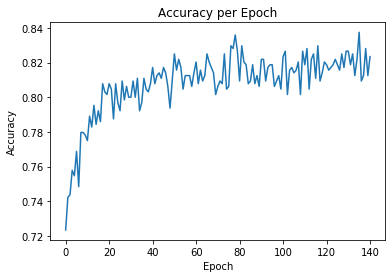

In [10]:
plt.plot(result2.history['accuracy'][9:], label='Accuracy')
plt.title("Accuracy per Epoch")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

In [11]:
model2.evaluate(X_test,Y_test22)

100/100 [==============================] - 0s 40us/step


[0.4639051431417465, 0.800000011920929]

In [12]:
model2.predict(X_test)

array([[0.9981517 ],
       [0.8782023 ],
       [0.15625836],
       [0.36698797],
       [0.60959524],
       [0.07123813],
       [0.53515863],
       [0.5419489 ],
       [0.13775331],
       [0.33504054],
       [0.07568375],
       [0.36293858],
       [0.6074744 ],
       [0.037559  ],
       [0.9781365 ],
       [0.42527306],
       [0.47228006],
       [0.8232825 ],
       [0.9865558 ],
       [0.42772606],
       [0.48793274],
       [0.988801  ],
       [0.9614101 ],
       [0.98778594],
       [0.6143648 ],
       [0.15817733],
       [0.6557506 ],
       [0.96110994],
       [0.17132463],
       [0.35971868],
       [0.99415934],
       [0.909128  ],
       [0.882218  ],
       [0.8987921 ],
       [0.88982403],
       [0.90994614],
       [0.63859236],
       [0.91512126],
       [0.97896427],
       [0.65392053],
       [0.9973201 ],
       [0.9898011 ],
       [0.95916635],
       [0.84934795],
       [0.37362555],
       [0.32621926],
       [0.4152782 ],
       [0.644

In [13]:
[1 if n > 0.5 else 0 for n in model2.predict(X_test)]

[1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]